In [1]:
import pandas as pd
import numpy as np
from math import *
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score
import sys, umap, re, hdbscan
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.cluster import estimate_bandwidth, DBSCAN, AffinityPropagation, KMeans, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
def runKmeans(nc,matrix,trueLabels):
    km=KMeans(n_clusters=nc).fit(matrix)
    labels=km.labels_
    print(trueLabels)
    print(labels)
    print(adjusted_rand_score(trueLabels,labels))
    
def runAggClu(nc,link,matrix,trueLabels):
    ac=AgglomerativeClustering(n_clusters=nc,linkage=link).fit(matrix)
    labels=ac.labels_
    print(adjusted_rand_score(trueLabels,labels))
    
def runMeanShift(matrix,trueLabels,bw):
    if not bw==0:
        ms=MeanShift(bandwidth=bw,bin_seeding=True).fit(matrix)
    else:
        ms=MeanShift(bin_seeding=True).fit(matrix)
    labels=ms.labels_
    print(adjusted_rand_score(trueLabels,labels))

def runAffProp(dp,matrix,trueLabels):
    ap = AffinityPropagation(damping=dp).fit(matrix)
    labels = ap.labels_
    print(adjusted_rand_score(trueLabels,labels))

def runDbscan(ep,matrix,trueLabels):
    db=DBSCAN(eps=ep,min_samples=10).fit(matrix)
    labels=db.labels_
    print(adjusted_rand_score(trueLabels,labels))

def runHdbscan(matrix,trueLabels):
    labels = hdbscan.HDBSCAN(min_samples=10).fit_predict(matrix)
    print(adjusted_rand_score(trueLabels, labels))

In [3]:
def natureData(inFile,annotFile):
    columnsToIgnore=3
    data=pd.read_table(inFile,sep='\t')
    cellNames=list(data)[columnsToIgnore:]
    srrIds=list(data)[columnsToIgnore:]
    cellTypes=[]
    with open(annotFile) as ANNOT:
        annotations=ANNOT.read().strip().split('\n')

    names={}
    for i in annotations[1:]:
        temp=i.split(',')
        names[temp[0]]=temp[2]

    for i in range(len(cellNames)):
        cellNames[i]=names[cellNames[i][:-2]]
        srrIds[i]=srrIds[i][:-2]
        m=re.search('(.*?)-.*',cellNames[i])
        cellTypes.append(m.group(1))

    le = LabelEncoder()
    le.fit(cellTypes)
    temp=le.classes_
    print(temp)
    print(le.transform(temp))
    colorIndices=le.transform(cellTypes)
    
    data=np.transpose(data.as_matrix().tolist())
    peaks=data[:columnsToIgnore]
    matrix=np.asarray(data[columnsToIgnore:],dtype='float')
    return(matrix,colorIndices,peaks,cellTypes)

In [4]:
def scienceData(inFile):
    columnsToIgnore=3
    data=pd.read_table(inFile,sep='\t')    
    cellTypes=list(data)[columnsToIgnore:]
    
    dropList=[]
    for i in cellTypes:
        if('Mixed' in i):
            dropList.append(i)
#     print(cellTypes)
#     print(dropList)
    data=data.drop(dropList,axis=1)
    cellTypes=list(data)[columnsToIgnore:]
#     print(cellTypes)
    fix = lambda x: x.split('.')[0]
    for i in range(len(cellTypes)):
        cellTypes[i]=fix(cellTypes[i])
    
    le = LabelEncoder()
    le.fit(cellTypes)
    print(le.classes_.tolist())
    print(le.transform(le.classes_))
    colorIndices=le.transform(cellTypes)
    
    data=np.transpose(data.as_matrix().tolist())
    peaks=data[:columnsToIgnore]
    matrix=np.asarray(data[columnsToIgnore:],dtype='float')
    return(matrix,colorIndices,peaks,cellTypes)

In [5]:
inFile='/Users/gulats/scATACseqProject/All_Human_Bam.tsv'
annotFile='/Users/gulats/sraAnnotWithSpecies.csv'
(matrix,colorIndices,peaks,cellTypes)=natureData(inFile,annotFile)

['BJ' 'GM' 'H1ESC' 'HL60' 'K562' 'TF1']
[0 1 2 3 4 5]


/Users/gulats/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [5]:
inFile='/home/saurabhg59/scATACseqProject/updatedMatrix'
(matrix,colorIndices,peaks,cellTypes)=scienceData(inFile)

['Human', 'Mouse']
[0 1]


/home/saurabhg59/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [6]:
inFile='/home/saurabhg59/scATACseqProject/updatedMatrix2'
(matrix,colorIndices,peaks,cellTypes)=scienceData(inFile)

ParserError: Error tokenizing data. C error: Expected 751 fields in line 41, saw 846


In [7]:
inFile='/home/saurabhg59/scATACseqProject/updatedMatrix3'
(matrix,colorIndices,peaks,cellTypes)=scienceData(inFile)

ParserError: Error tokenizing data. C error: Expected 703 fields in line 46, saw 838


In [6]:
# copy=matrix.tolist()
# copy=np.asarray(copy)

In [7]:
# totalCells=len(matrix)
# numPeaks=len(peaks[0])
# colorIndices

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

/home/saurabhg59/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float32 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/home/saurabhg59/miniconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


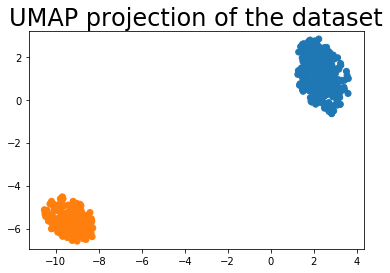

In [7]:
reducer = umap.UMAP(n_components=2,metric='jaccard',n_neighbors=20,min_dist=0,random_state=42)
embedding = reducer.fit_transform(matrix)
plt.scatter(embedding[:, 0], embedding[:, 1],c=[sns.color_palette(n_colors=15)[x] for x in colorIndices])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);
# plt.legend(['BJ' ,'GM' ,'H1ESC' ,'HL60' ,'K562', 'TF1'])

In [7]:
with open('umapNatureYule.txt','w') as OUTPUT:
    for i in range(len(cellTypes)):
        OUTPUT.write(str(embedding[i,0])+"\t"+str(embedding[i,1])+"\t"+cellTypes[i]+"\n")

In [8]:
# neighbours=[5,7,10,12,15,17]
# components=[2,5,10,15,20,30]

clusterable_embedding = umap.UMAP(
    n_neighbors=15,
    min_dist=0.0,
    n_components=2,
    random_state=42,
    metric='yule'
).fit_transform(matrix)

/Users/gulats/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float32 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


In [9]:
runDbscan(ep=0.3,matrix=embedding,trueLabels=colorIndices)
runDbscan(ep=0.3,matrix=clusterable_embedding,trueLabels=colorIndices)

0.829119803146156
0.9591980691038186


In [10]:
runAffProp(dp=0.9,matrix=embedding,trueLabels=colorIndices)
runAffProp(dp=0.9,matrix=clusterable_embedding,trueLabels=colorIndices)

0.5588403957826863
0.4418163554554506


In [11]:
runHdbscan(matrix=embedding,trueLabels=colorIndices)
runHdbscan(matrix=clusterable_embedding,trueLabels=colorIndices)

0.8277380374311138
0.9734131672471099


In [12]:
runKmeans(nc=6,matrix=embedding,trueLabels=colorIndices)
runKmeans(nc=6,matrix=clusterable_embedding,trueLabels=colorIndices)

0.9410625482615205
0.9677695379518472


In [13]:
runAggClu(nc=6,link='ward',matrix=embedding,trueLabels=colorIndices)
runAggClu(nc=6,link='ward',matrix=clusterable_embedding,trueLabels=colorIndices)

0.8805880033479684
0.7058534866362722


In [14]:
runMeanShift(bw=1.2,matrix=embedding,trueLabels=colorIndices)
runMeanShift(bw=1.15,matrix=clusterable_embedding,trueLabels=colorIndices)

0.8277380374311138
0.9675031890004653


In [ ]:
distances=pairwise_distances(matrix,metric='jaccard')

/Users/gulats/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


In [18]:
pca=PCA(n_components=50,svd_solver='full')
components=pca.fit_transform(distances)

In [61]:
tfidf=TfidfTransformer().fit_transform(matrix)
svd=TruncatedSVD(n_components=50,random_state=100)
tsvd=svd.fit_transform(tfidf)

In [62]:
t=TSNE(random_state=100,n_iter=3000)
test=t.fit_transform(tsvd)

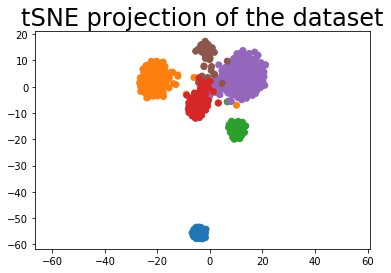

In [63]:
plt.scatter(test[:, 0], test[:, 1],c=[sns.color_palette(n_colors=15)[x] for x in colorIndices])
plt.gca().set_aspect('equal', 'datalim')
plt.title('tSNE projection of the dataset', fontsize=24);

In [50]:
# with open('tsneScience3.txt','w') as OUTPUT:
#     for i in range(len(cellTypes)):
#         OUTPUT.write(str(test[i,0])+"\t"+str(test[i,1])+"\t"+cellTypes[i]+"\n")

In [64]:
runHdbscan(matrix=test,trueLabels=colorIndices)
runMeanShift(bw=0,matrix=test,trueLabels=colorIndices)
runAggClu(nc=6,link='ward',matrix=test,trueLabels=colorIndices)
runAffProp(dp=0.9,matrix=test,trueLabels=colorIndices)
runKmeans(nc=6,matrix=test,trueLabels=colorIndices)

0.7459183209496055
0.5037791028002832
0.8000190137483444
0.42347197866896774
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 

In [65]:
runHdbscan(matrix=tsvd,trueLabels=colorIndices)
runMeanShift(bw=0,matrix=tsvd,trueLabels=colorIndices)
runAggClu(nc=6,link='ward',matrix=tsvd,trueLabels=colorIndices)
runAffProp(dp=0.9,matrix=tsvd,trueLabels=colorIndices)
runKmeans(nc=6,matrix=tsvd,trueLabels=colorIndices)

0.25016747356977725
0.0
0.8372072936397835
0.163443262844546
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

In [27]:
smoll=NMF(n_components=25,random_state=100,init='nndsvda').fit_transform(matrix)
# dist=pairwise_distances(smoll,metric='jaccard')
# pca=PCA(n_components=10,svd_solver='full')
# components=pca.fit_transform(smoll)

In [28]:
runHdbscan(matrix=components,trueLabels=colorIndices)
runMeanShift(bw=0.6,matrix=components,trueLabels=colorIndices)
runAggClu(nc=6,link='ward',matrix=components,trueLabels=colorIndices)
runAffProp(dp=0.9,matrix=components,trueLabels=colorIndices)
runKmeans(nc=6,matrix=components,trueLabels=colorIndices)

0.005931099448662865
0.0
0.1167467921547083
0.035204271523326
0.2304683282661991


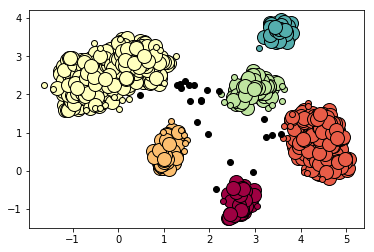

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = embedding[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = embedding[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()